##### Hasti Hojabr Sadati - hastihojabr@gmail.com

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import warnings
from IPython.display import display, HTML
warnings.filterwarnings("ignore")

## Random Deposition Model

In [2]:
def RandomDeposition(L,T,E): #lenght , time , number of ensambles
    h,l = np.zeros(L),np.linspace(0,L,L)      ;   W=[]
    for e in range(E):
        h,l = np.zeros(L),np.linspace(0,L,L)  ; w,x,y = [],[],[]
        for t in range(T):
            i = int(np.random.uniform()*L+1)%L
            h[i] += 1
            if e==E-1: x.append(l[i]) ; y.append(h[i%L])
            w.append(np.std(h))
        W.append(w) 
    return np.average(W, axis=0),np.arange(0,T,1),x,y,W

coef = 0.5180942807270851


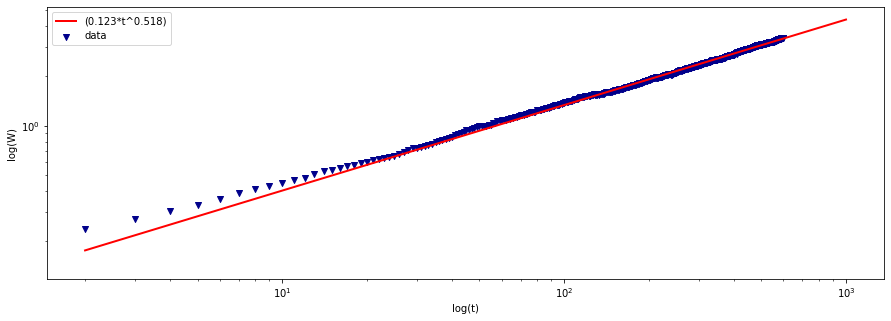

In [362]:
from scipy.optimize import curve_fit
W,t,x,y,allw = RandomDeposition(50,600,15)
fig = plt.figure(figsize=(15, 5))
ax = plt.gca()
ax.scatter(t,W,c="darkblue",marker='v', label='data')
ax.set_yscale('log')
ax.set_xscale('log')
newX = np.logspace(0.3, 3, base=10)
def function(x,a,b,v):
    return a * np.power(x, b)
popt, pcov = curve_fit(function,t,W)
plt.plot(newX, function(newX, *popt),lw=2, color='r', label="({0:.3f}*t^{1:.3f})".format(*popt))
print('coef = {}'.format(popt[1]))
ax.set_xlabel('log(t)')
ax.set_ylabel('log(W)')
plt.legend()
plt.show()

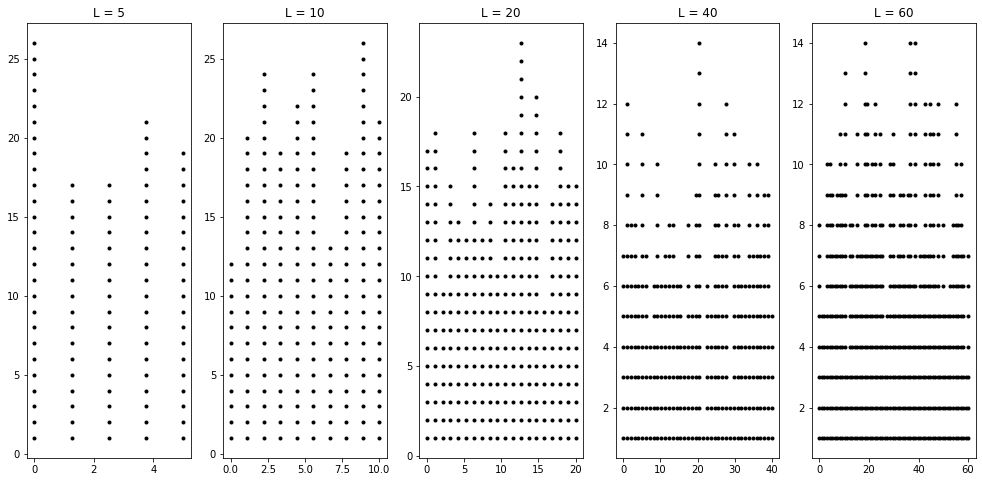

In [5]:
W,t,x5,y5,_   = RandomDeposition(5,100,1)
W,t,x10,y10,_ = RandomDeposition(10,200,1)
W,t,x20,y20,_ = RandomDeposition(20,300,1)
W,t,x40,y40,_ = RandomDeposition(40,300,1)
W,t,x60,y60,_ = RandomDeposition(60,500,1)

fig = plt.figure(figsize=(17, 8))
for i,j,ax,name in zip([x5,x10,x20,x40,x60],[y5,y10,y20,y40,y60],range(1,7),[5,10,20,40,60]):
    ax =  fig.add_subplot(1, 5, ax )
    ax.scatter(i,j,color = 'k',marker = '.')
    ax.set_title('L = {}'.format(name))

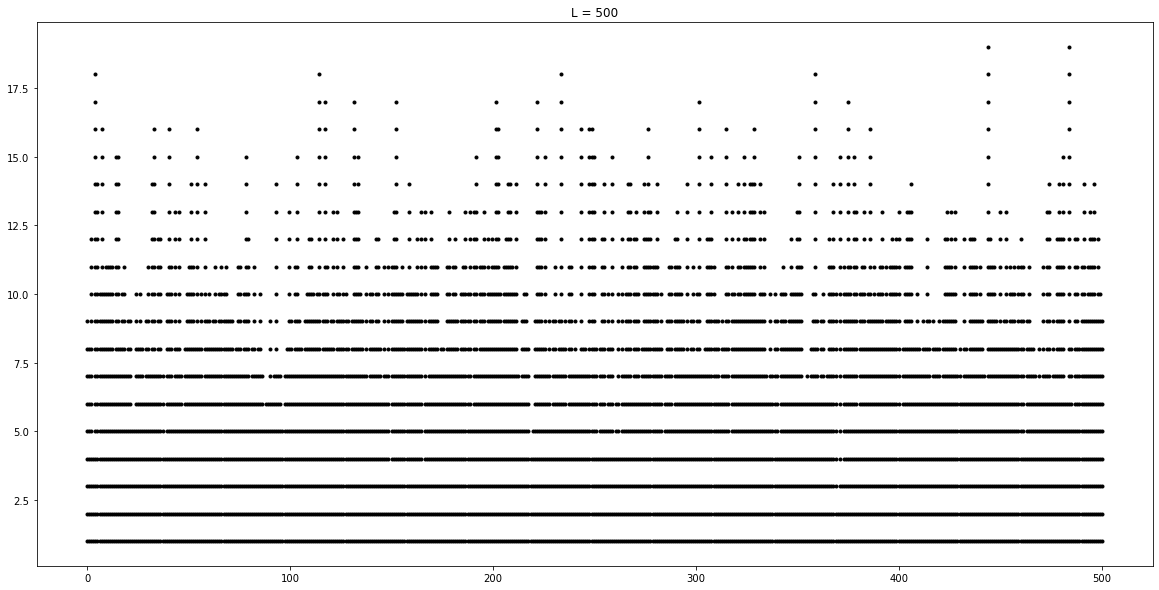

In [9]:
W,T,X,Y,_= RandomDeposition(500,5000,1)
fig = plt.figure(figsize=(20, 10))
plt.scatter(X,Y,color = 'k',marker = '.')
plt.title('L = {}'.format(500))
plt.show()

## Ballistic deposition model

In [240]:
def BallisticDeposition(L,T,E): #lenght , time , number of ensambles
    start=time.time()
    h,l = np.zeros(L),np.linspace(0,L,L)      ;   W=[]
    for e in range(E):
        h,l = np.zeros(L),np.linspace(0,L,L)  ; w,x,y = [],[],[]
        for t in range(T):
            i = round(np.random.random_sample()* L)
            h[i%L] = np.max([h[(i-1)%L],h[(i)%L],h[(i+1)%L]])+1
            if e==E-1:    x.append(l[(i+1)%L]) ;   y.append(h[i%L])
            w.append(np.std(h))
        W.append(w) 
    time.sleep(1)
    end=time.time()
    print('Wall time:',end-start,'s.') 
    return np.average(W, axis=0),np.arange(0,T,1),x,y,W,end-start

In [283]:
def Plot(t,w,allw,L):
    plt.figure(figsize=(20, 10))

    plt.subplot(2,2,1) 
    plt.loglog(t,w,c="brown",lw=3, label='Data points. L={}'.format('t'))
    plt.title('Power-law distributed noise for L={}.'.format(L))
    plt.ylabel('log(W)')

    plt.subplot(2,2,2) 
    for k in range(0,len(allw)): 
        plt.loglog(t,allw[k])
    plt.title('Ensambles of noise for L={}.'.format(L))
    
    plt.subplot(2,2,3) 
    x = np.log(t[1:6]) ;y = np.log(w[1:6])
    m,b = np.polyfit(x, y, 1)
    plt.scatter(x, y, c="darkblue",marker='v',label='Data',lw=3)
    plt.plot(x, m*x+b, '--k',label="({1:.3f}t^{0:.3f})".format(m,b))
    beta = m
    plt.xlabel('log(t)')
    plt.ylabel('log(W)')
    plt.title('beta')
    plt.legend()

    plt.subplot(2,2,4) 
    x = np.log(t[len(t)-L*20:]) ;y = np.log(w[len(t)-L*20:])
    m,b = np.polyfit(x, y, 1) 
    plt.scatter(x, y, c="darkblue",marker='v',label='Data',lw=3)
    plt.plot(x, m*x+b, '--k',label="({1:.3f}t^{0:.3f})".format(m,b))
    alpha = m
    plt.xlabel('log(t)')
    plt.title('alpha')
    plt.legend()
    plt.show()
    return alpha , beta

In [266]:
w,t,x,y,allw,walltime = BallisticDeposition(100,100*120,15)

Wall time: 13.34988808631897 s.


In [180]:
w150,t150,x150,y150,allw150,time150 = BallisticDeposition(150,150*350,10)

Wall time: 36.476409912109375 s.


In [196]:
w180,t180,x180,y180,allw180,time180 = BallisticDeposition(180,180*350,10)

Wall time: 43.77985119819641 s.


In [199]:
w200,t200,x200,y200,allw200,time200 = BallisticDeposition(200,200*350,10)

Wall time: 50.6443247795105 s.


In [205]:
w220,t220,x220,y220,allw220,time220 = BallisticDeposition(220,220*350,10)

Wall time: 53.4394907951355 s.


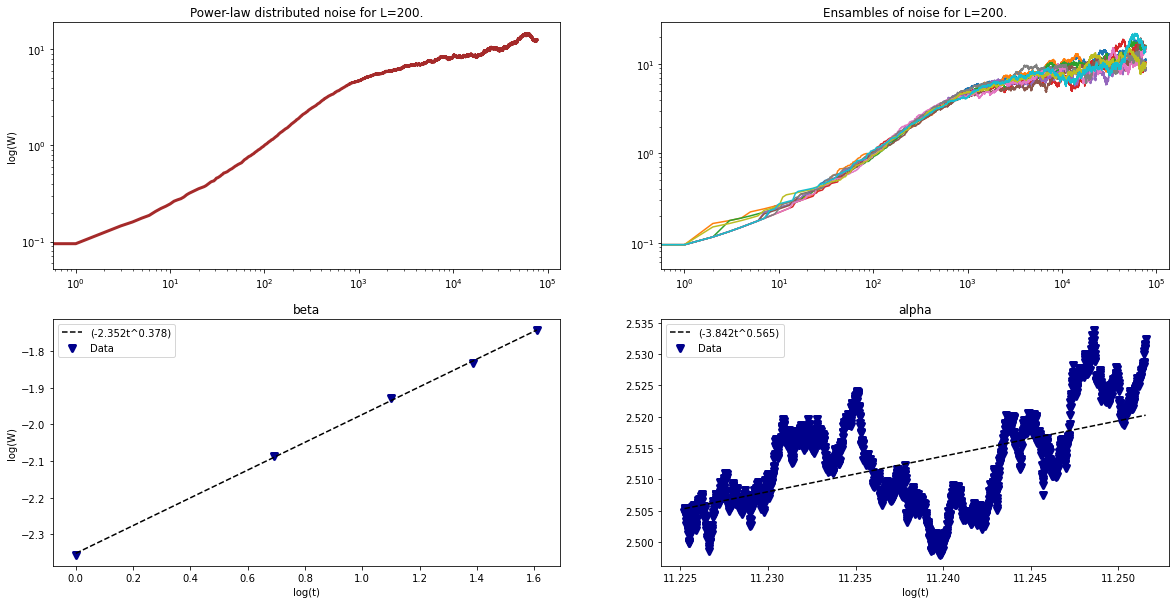

alpha =  0.57
beta =  0.38


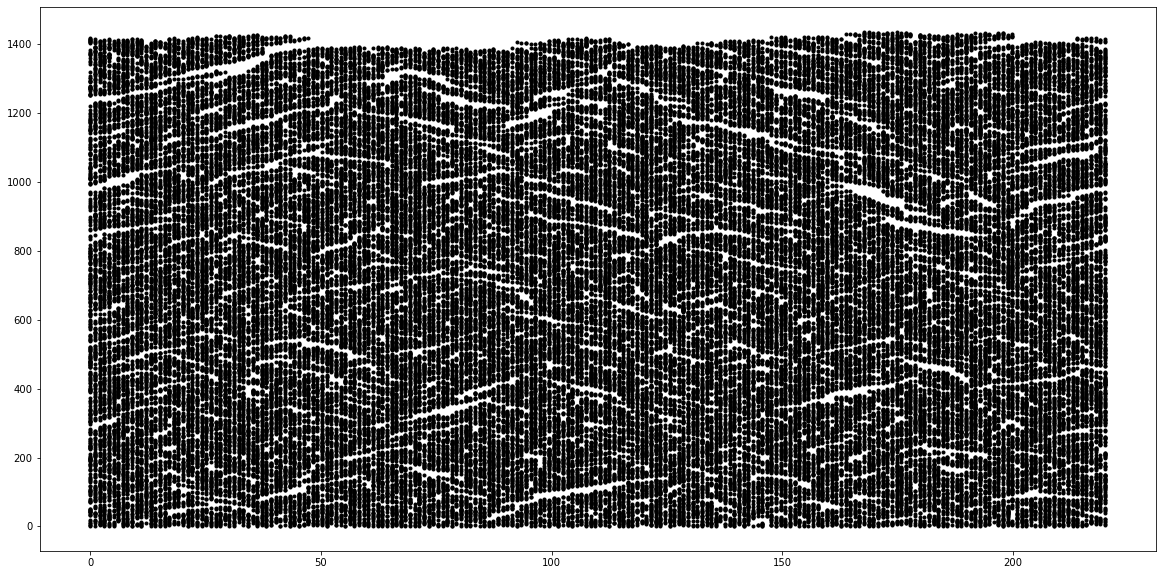

In [281]:
alpha,beta = Plot(t220,w220,allw220,200)
print('alpha = ',round(alpha,2))  #close to 0.5
print('beta = ',round(beta,2))    #close to 1/3=0.33
fig = plt.figure(figsize=(20, 10))
plt.scatter(x220,y220,color = 'k',marker = '.')
plt.show()

In [209]:
def alpha_beta(t,w,L):
    x = np.log(t[1:6]) ;y = np.log(w[1:6])
    beta,b = np.polyfit(x, y, 1)
    x = np.log(t[len(t)-L*20:]) ;y = np.log(w[len(t)-L*20:])
    alpha,b = np.polyfit(x, y, 1) #alpha
    print(alpha , beta)
    return alpha , beta

In [220]:
a150,b150 = alpha_beta(t150,w150,150)
a180,b180 = alpha_beta(t180,w180,180)
a200,b200 = alpha_beta(t200,w200,200)
a220,b220 = alpha_beta(t220,w220,220)

0.7109845918448809 0.3639881056160377
0.18227672131584233 0.37675889389781886
0.5670050967423704 0.38721008063369633
0.5654542993069781 0.3783078668873476


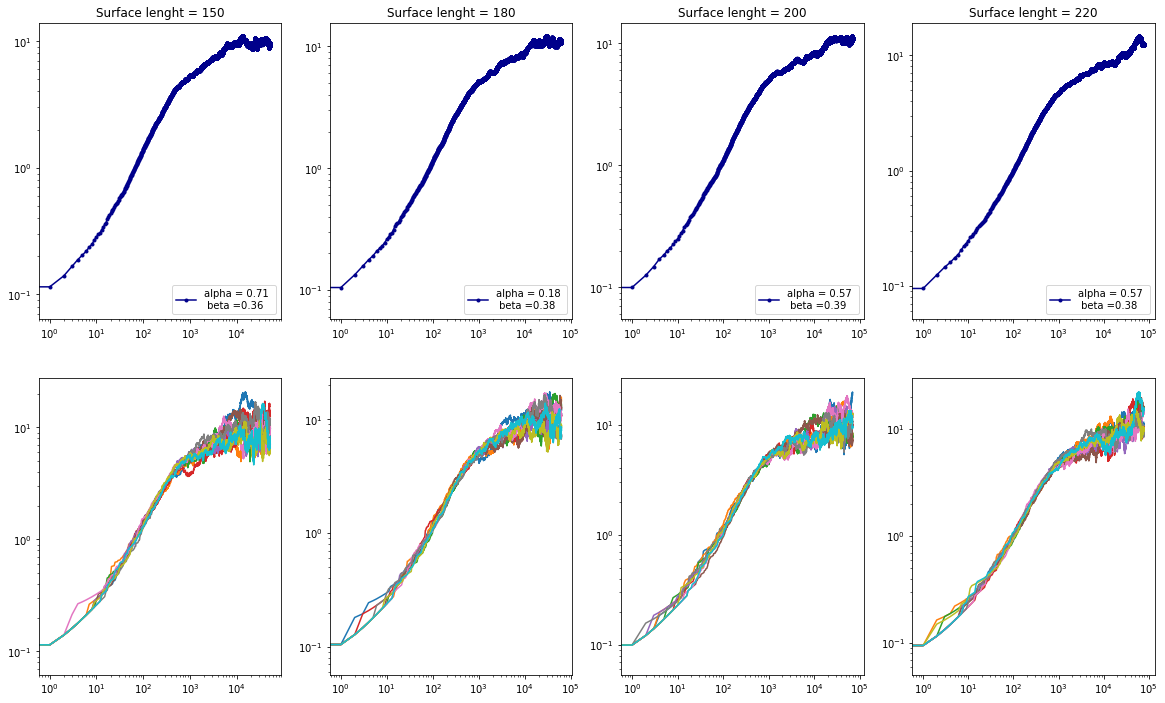

Average alpha =  0.5064301773025179
Average beta =  0.37656623675872514


In [258]:
from scipy.optimize import curve_fit
beta, alpha = [],[]
fig = plt.figure(figsize=(20, 12))
for i,j,alpha,beta,ax,name,index in zip([t150,t180,t200,t220,t150,t180,t200,t220],
                       [w150,w180,w200,w220,allw150,allw180,allw200,allw220],
                       [a150,a180,a200,a220,a150,a180,a200,a220],
                       [b150,b180,b200,b220,b150,b180,b200,b220],   
                       range(1,5*2),[150,180,200,220,150,180,200,220],range(8)):
    start=time.time()
    ax =  fig.add_subplot(2, 4, ax )
    if index<4:
        ax = plt.gca()
        ax.loglog(i,j,c="darkblue",marker='.', label='alpha = {} \n beta ={}'.format(round(alpha,2),round(beta,2)))
        plt.title('Surface lenght = {}'.format(name))
        plt.legend(loc='lower right')
    else:
        for k in range(0,len(j)):
            ax.loglog(i,j[k])
plt.show()
print('Average alpha = ',np.mean([a150,a180,a200,a220]))
print('Average beta = ',np.mean([b150,b180,b200,b220]))


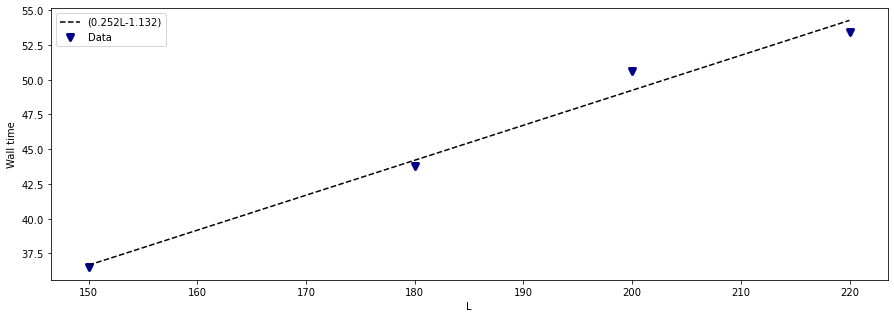

In [252]:
import numpy as np
walltime = [time150,time180,time200,time220]
L = [150,180,200,220]

x = np.array(L) ;y = np.array(walltime)
m,b = np.polyfit(x, y, 1) 

fig = plt.figure(figsize=(15, 5))
plt.scatter(x, y, c="darkblue",marker='v',label='Data',lw=3)
plt.plot(x, m*x+b, '--k',label="({1:.3f}L{0:.3f})".format(b,m))
plt.xlabel('L')
plt.ylabel('Wall time')
plt.legend()
plt.show()

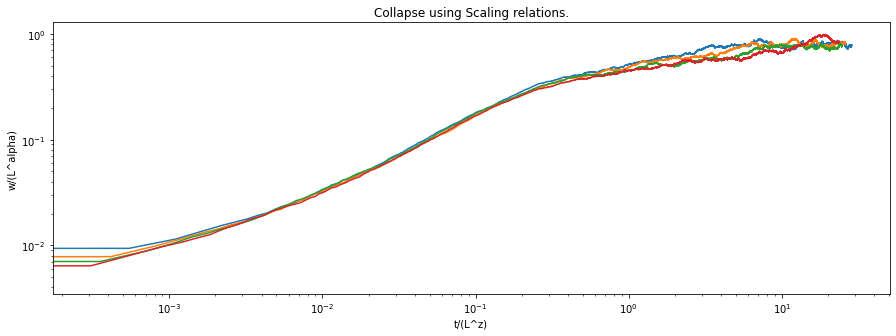

In [254]:
def Scaling_relation(w,t,L):
    alpha = 0.5 ; beta = 1/3
    z= alpha/beta
    return t/(L**z),w/(L**alpha)

fig = plt.figure(figsize=(15, 5))
for i,j,l in zip([t150,t180,t200,t220],[w150,w180,w200,w220],[150,180,200,220]):
    x,y= Scaling_relation(j,i,l)
    plt.loglog(x,y)

plt.title('Collapse using Scaling relations.')
plt.xlabel('t/(L^z)')
plt.ylabel('w/(L^alpha)')
plt.show()

## Random deposition model with surface relaxation

In [282]:
def RandomDepositionRelaxed(L,T,E): #lenght , time , number of ensambles
    start=time.time()
    h,l = np.zeros(L),np.linspace(0,L,L)      ;   W=[]
    for e in range(E):
        h,l = np.zeros(L),np.linspace(0,L,L)  ; w,x,y = [],[],[]
        for t in range(T):
            i = round(np.random.random_sample()* L)
            minn = min([h[(i-1)%L],h[(i)%L],h[(i+1)%L]]) 
            if h[(i-1)%L]==minn : h[(i-1)%L]+=1
            elif h[(i)%L]==minn : h[(i)%L]  +=1
            elif h[(i+1)%L]==h[(i-1)%L]==minn:
                if np.random.rand()<0.5: h[(i+1)%L]+=1
                else: h[(i-1)%L]+=1
            else                : h[(i-1)%L]+=1
            w.append(np.std(h))
            if e==E-1:    x.append(l[(i+1)%L]) ;   y.append(h[index])
        W.append(w) 
    time.sleep(1)
    end=time.time()
    print('Wall time:',end-start,'s.') 
    return np.average(W, axis=0),np.arange(0,T,1),x,y,W,end-start

In [379]:
w,t,x,y,allw,walltime = RandomDepositionRelaxed(300,300*350,30)

Wall time: 174.96872401237488 s.


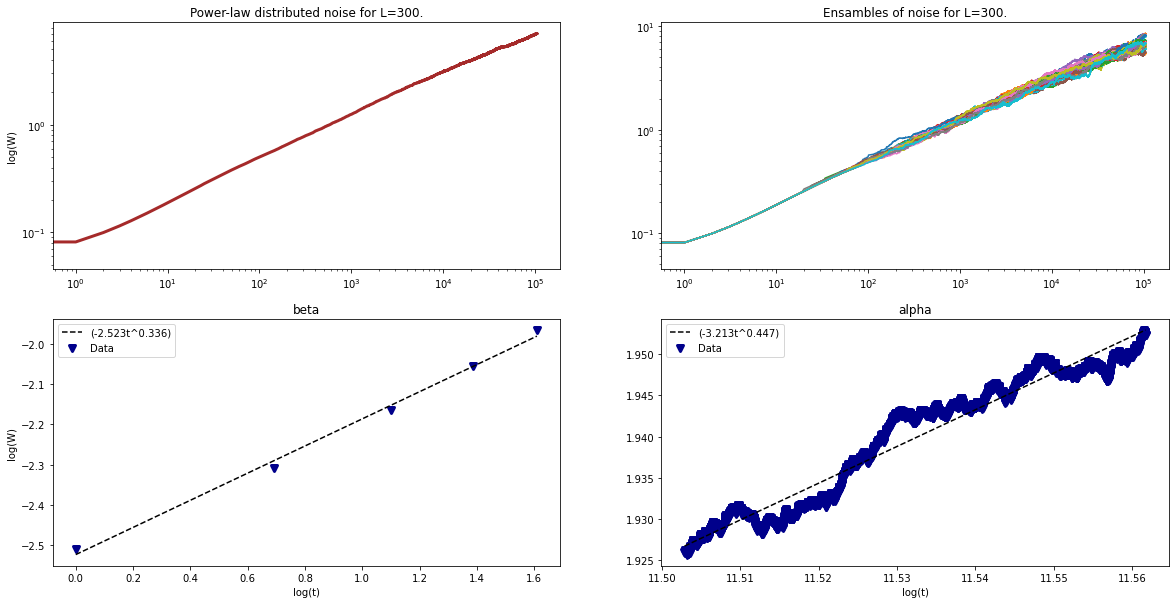

alpha =  0.45
beta =  0.34


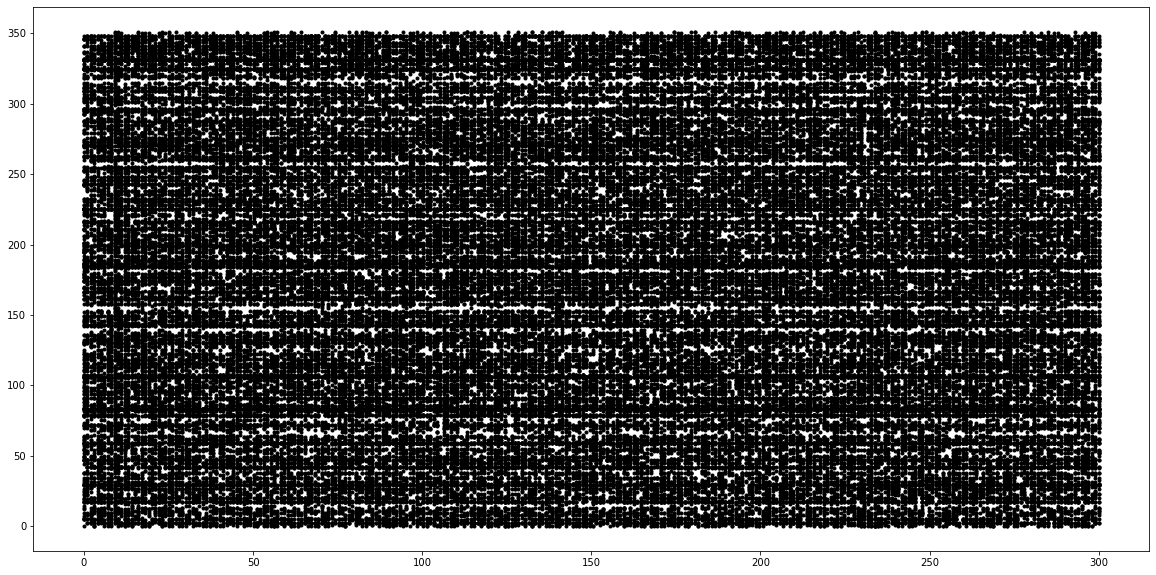

In [380]:
alpha,beta = Plot(t,w,allw,300)
print('alpha = ',round(alpha,2))  #close to 0.48
print('beta = ',round(beta,2))    #close to 0.24
fig = plt.figure(figsize=(20, 10))
plt.scatter(x,y,color = 'k',marker = '.')
plt.show()